# BRUSSELATOR

Le Brusselator est un modèle décrivant des systèmes chimiques autocatalytiques imaginé par Ilya Prigogine à l'université libre de Bruxelles. Dans ce rapport nous analyserons d'abord le cas du Brusselator 0D, puis dans un deuxième temps, nous analyserons le cas du Brusselator 1D dans lequel un terme de diffusion spatiale a été rajouté.

## Le Brusselator 0D

Nous utilisons la méthode Runge-Kutta d'ordre 4 pour intégrer les équations suivantes :

$$
  \frac{du}{dt} = A+u^2v-Bu-u
$$
$$
  \frac{dv}{dt} = Bu-u^2v
$$

### Analyse des graphes pour différentes valeurs de B

En fixant $A = 1$ et en faisant varier les valeurs de $B$, on observe que les graphes des concentrations $u$-$v$ pour $B = 1, 1.5$ et $1.9$ convergent vers un point d'équilibre, ce qui est confirmé par la tendance de $u$ et $v$ à converger vers une constante en fonction du temps (nous démontrerons plus tard que les valeurs de cette constante sont bel et bien celles du point d'équilibre).
<br>
Mais en observant les graphes pour $B = 2.1, 3$ et $4$, on remarque qu'ils convergent vers un cycle limite et non un équilibre. Les concentrations évoluant en fonction du temps ne convergent désormais plus vers une constante mais oscillent indéfiniment, ce qui  correspond bel et bien à la création d'un cycle limite.
<br>
<br>
Le systéme subit donc une bifurcation aux alentours de $B = 2$ que l'on appelle bifurcation de Hopf, c'est-à-dire que le système passe de stable à instable à partir d'une valeur critique.
<br>
<br>
Le calcul suivant montre que le point d'équilibe est $p = (A,\frac{B}{A})$ et que la bifurcation se fait précisément à $B = 2$.
<br>
<br>
### Calcul de la bifurcation 
Equilibres
$$
  \frac{du}{dt} = A+u^2v-Bu-u = 0 \rightarrow u = A
$$
$$
  \frac{dv}{dt} = Bu-u^2v = 0 \rightarrow v = \frac{B}{A}
$$

Jacobienne 
$$
  J(A,\frac{B}{A}) = \begin{bmatrix} 2B-B-1 & A^2  \\ B-2B & -A^2 \end{bmatrix} = \begin{bmatrix} B-1 & A^2  \\ -B & -A^2 \end{bmatrix} 
$$

Valeurs propres (pour $A = 1$)
$$
  \lambda_{+,-} = -\frac{b}{2} \pm \frac{\sqrt{\Delta}}{2}      \textrm{avec $b = 2-B$ et $\Delta = B(B-2)$}
$$

Le système est stable lorsque Re($\lambda_{+,-}$) < 0 :
<br>
Si $B>2$, $\Delta \in \mathbb{R}$ et pour que le système soit stable, il faut que $ -\frac{b}{2} \pm \frac{\sqrt{\Delta}}{2} <0$ et par conséquent il faut que $2-B$ > $\sqrt{\Delta}$, ce qui est impossible car $2-B$ est négatif. Pour $B>2$, le système est donc instable. 
<br>
<br>
Si $B<2$, $\Delta \in \mathbb{C}$ et donc il faut que $\frac{-b}{2} <0$ $\rightarrow B<2$. Le système est stable pour $B<2$ et nous avons donc bel et bien une bifurcation en $B = 2$.
<br>
Plus généralement, le système est stable pour $B<A^2+1$.

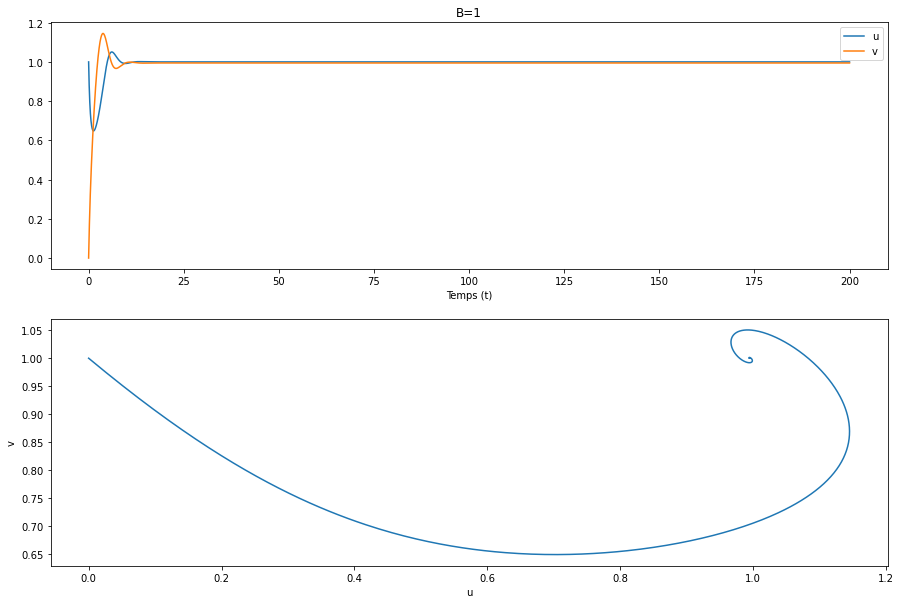

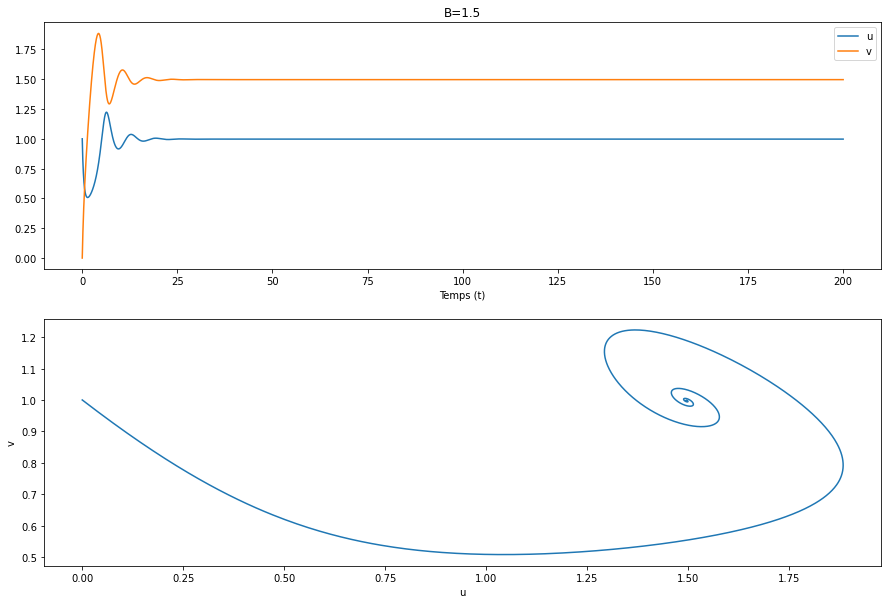

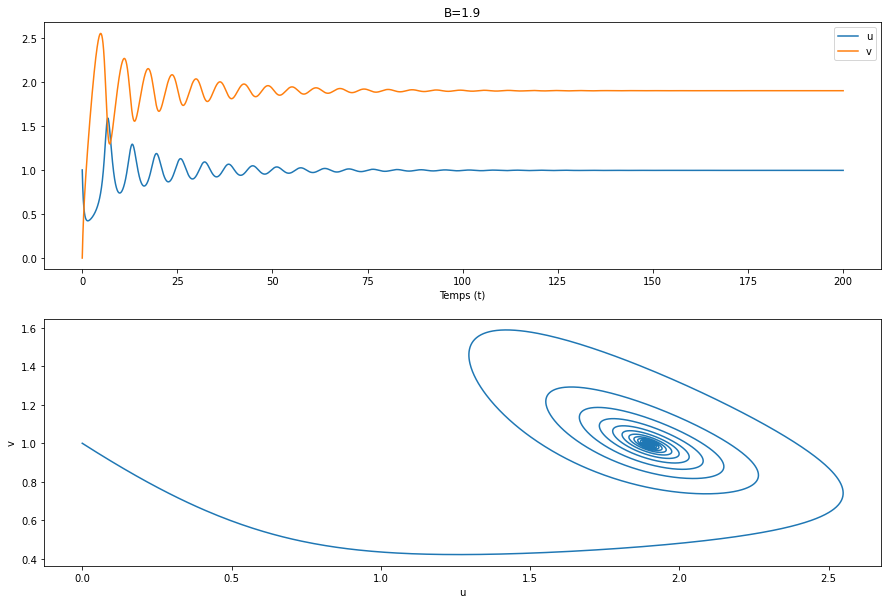

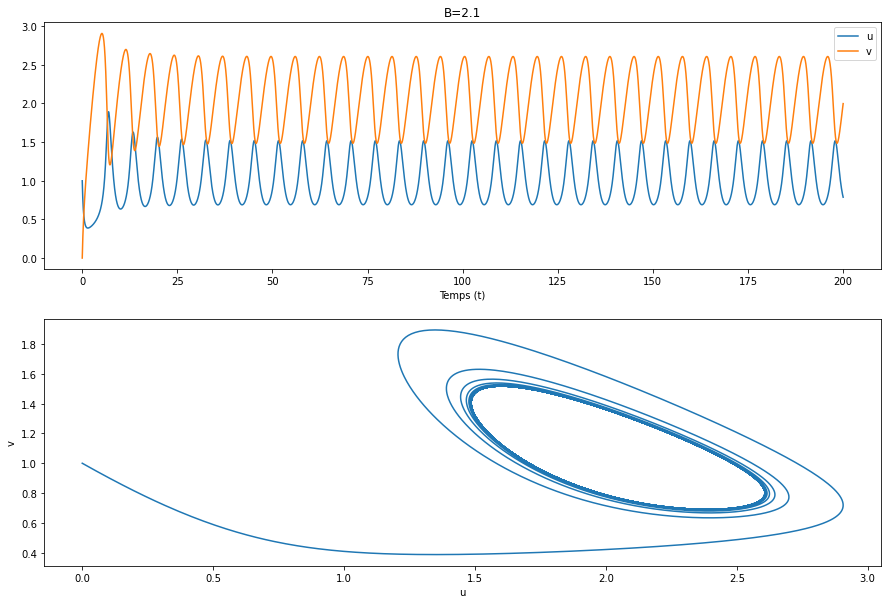

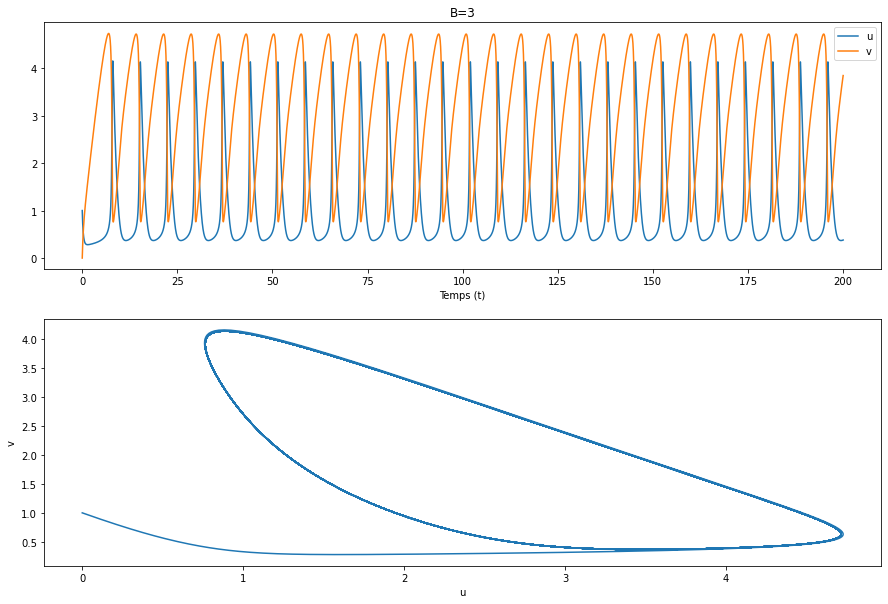

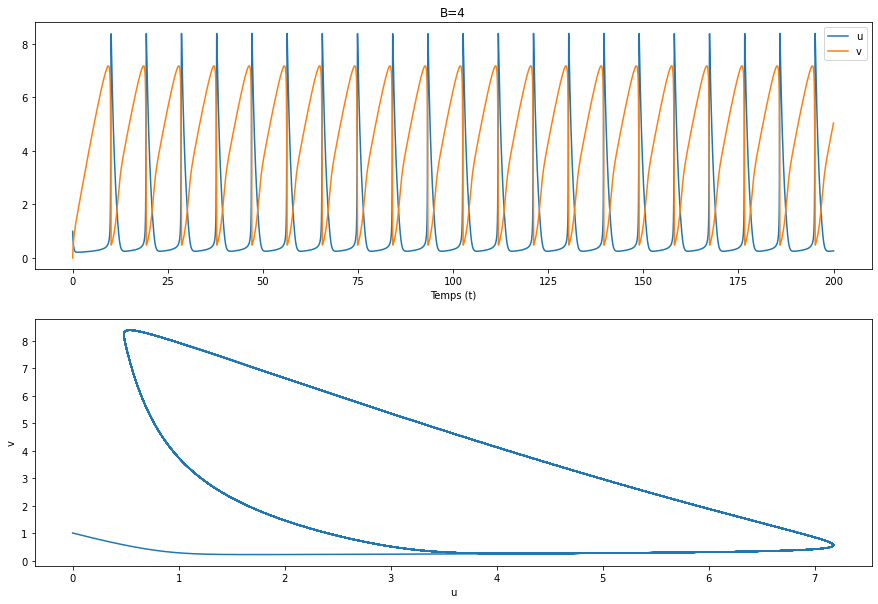

In [92]:
import numpy as np
import matplotlib.pyplot as plt

tmax=200
k=1/75
N=int(np.floor(tmax/k))+1
t=np.linspace(0,tmax,N)

u=np.zeros(N)
v=np.zeros(N)

#Conditions initiales 
u[0]=1
v[0]=0

for j in range(6):
    
    A = 1
    B = (1,1.5,1.9,2.1,3,4)

    for i in range(N-1):
        k1 = k*(A+(v[i]*u[i]**2)-B[j]*u[i]-u[i])
        k2 = k*(A+((u[i]+k1/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k1/2)-(u[i]+k1/2))
        k3 = k*(A+((u[i]+k2/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k2/2)-(u[i]+k2/2))
        k4 = k*(A+((u[i]+k3/2)**2)*(v[i]+k/2)-B[j]*(u[i]+k3/2)-(u[i]+k3/2))
        k1v = k*(B[j]*u[i]-v[i]*u[i]**2)
        k2v = k*(B[j]*(u[i]+k/2)-(v[i]+k1v/2)*(u[i]+k/2)**2)
        k3v = k*(B[j]*(u[i]+k/2)-(v[i]+k2v/2)*(u[i]+k/2)**2)
        k4v = k*(B[j]*(u[i]+k/2)-(v[i]+k3v/2)*(u[i]+k/2)**2)
        u[i+1] = u[i]+(1/6)*(k1+2*k2+2*k3+k4)
        v[i+1] = v[i]+(1/6)*(k1v+2*k2v+2*k3v+k4v)



    fig,ax=plt.subplots(2,figsize=(15,10))
    ax[0].plot(t,u,label = 'u' )
    ax[0].plot(t,v, label= 'v')
    ax[0].legend(loc="upper right")
    ax[0].set_title(f"B={B[j]}")
    ax[0].set_xlabel('Temps (t)')
    ax[1].plot(v,u)
    ax[1].set_xlabel('u')
    ax[1].set_ylabel('v')
    print("")
    plt.show()
    


## Le Brusselator 1D


En rajoutant un terme de diffusion spatiale, nous obtenons le modèle du Brusselator 1D :

$$
  \frac{du}{dt} = A+u^2v-Bu-u+D_{u}\nabla^{2}u
$$
$$
  \frac{dv}{dt} = Bu-u^2v+D_{v}\nabla^{2}v
$$


Nous dérivons ces équations en utilisant la méthode SBDF :


$$
  \frac{u_{i+1,j}-u_{i,j}}{k} = A+u_{i,j}^2v_{i,j}-Bu_{i,j}-u_{i,j}+D_{u}\frac{u_{i+1,j+1}-2u_{i+1,j}+u_{i+1,j-1}}{h^2}
$$
$\iff$
$$
  u_{i+1,j} = u_{i,j} + k(A+u_{i,j}^2v_{i,j}-Bu_{i,j}-u_{i,j})+\frac{D_{u}k}{h^2}(u_{i+1,j+1}-2u_{i+1,j}+u_{i+1,j-1})
$$

Avec $\lambda =\frac{D_{u}k}{h^2}$, on a :

$$
  (1+2\lambda)u_{i+1,j}-\lambda u_{i+1,j+1} -\lambda u_{i+1,j-1} = u_{i,j}(1+ku_{i,j}v_{i,j}-k(B+1))+kA  
$$ 
$\iff$
$$
  g(u_{i+1}) = u_{i}(1+ku_{i}v_{i}-k(B+1))+kA
$$
avec  
$$
g =
  \begin{bmatrix}
    1+2\lambda   & -\lambda & 0 & \dots & 0 \\
    -\lambda     & 1+2\lambda & -\lambda & \dots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \vdots \\
    0    & \dots & -\lambda & 1+2\lambda & -\lambda \\
    0    &  \dots & 0 & -\lambda & 1+2\lambda   
  \end{bmatrix}
$$
<br>
<br>
Cependant, cette matrice ne sera pas celle qui sera utilisée. En effet, il nous faut respecter les conditions aux bord de Neumann suivantes : $\frac{\partial u}{\partial x}(0,t) = \frac{\partial u}{\partial x}(L,t) = 0$ et $\frac{\partial v}{\partial x}(0,t) = \frac{\partial v}{\partial x}(L,t)$ avec $L = 50$. En d'autres termes, il faut que les 2 premières composantes de chaque vecteur $u$ doivent être égales et de même pour les 2 dernières (idem pour $v$). Pour ce faire, discrétisons les 3 premières composantes de $u^{i}$ en multipliant le vecteur $u^{i-1}$ par $g$ (ici les indices $i$ portent bien sur le vecteur et non les composantes) afin d'avoir $u_{0} = u_{1}$ : 

$$
  -\lambda u_{0} +(1+2\lambda)u_{1} -\lambda u_{2} = a u_{0} +b u_{1}+c u_{2}
$$

On pose $c = -\lambda$ pour faire disparaitre $u_{2}$ ainsi que $a = 1-\lambda$ et $b = 2\lambda$ pour aussi faire disparaitre les $\lambda$ : 

$$
  -\lambda u_{0} +(1+2\lambda)u_{1} = (1-\lambda)u_{0} + 2\lambda u_{1}
$$

Ce qui nous donne bien

$$
  u_{1}=u_{0}
$$

On répète l'opération pour $u_{i-1}$ et $u_{i}$ et la nouvelle matrice $g$ est donc :

$$
  g =
  \begin{bmatrix}
    1-\lambda   & 2\lambda & -\lambda & 0 & \dots & 0 \\
    -\lambda     & 1+2\lambda & -\lambda & 0 & \dots & 0 \\ 
    \vdots & \ddots & \ddots & \ddots & \vdots & \vdots\\
    0 & \dots & 0 & -\lambda & 1+2\lambda & -\lambda \\
    0   &  \dots & 0 & -\lambda & 2\lambda & 1-\lambda   
  \end{bmatrix}
$$
<br>

Un calcul analogue pour $v$ donne $z(u_{i+1}) = kBu_{i}+v_{i}(1-ku_{i}^{2})$, $z$ étant la même matrice que g mais avec $\lambda = \frac{D_{v}k}{h^2}$

### Observations et analyses de différents cas

Ce qui est intéressant d'observer dans le Brusselator 1D est justement cette dimension spatiale que l'on a rajoutée. Nous analyserons différents cas à différent temps en faisant varier $B$ et $D_{u}$.

#### Cas 1 ($B=1.3$ , $D_{u}=0.1$) :
<br>
Lorsque $tmax = 5$ et $tmax = 50$, on voit que les valeurs de $u$ et $v$ restent constantes pour tout $x$. Pour $tmax = 100$, on commence à observer des petites oscillations et pour $tmax = 200$ on constate que le système comprend de larges oscillations périodiques pour $u$ et de plus petites pour $v$. En d'autres termes, plus on attend, plus $u$ sera concentré autour de certains points sur la droite tandis que $v$ se répartit sur un espace plus grand ; ce qui était attendu au vu du très petit coefficient de diffusion $D_{u}$.
<br>

#### Cas 2 ($B=1.3$ , $D_{u}=10$) :
<br>
Ce cas-ci est plus simple : excepté au tout début de la réaction où l'on observe une petite asymétrie, on note une répartition homogène des concentrations dans l'espace pour $tmax = 50,100,200$,etc... Ceci est expliqué par le fait que $B$ est suffisament petit pour que $u$ et $v$ se stabilisent autour d'une constante comme vu dans le cas du Brusselator 0D, et par le fait que les coefficients de diffusion $D_{u}$ et $D_{v}$ sont très grands. Ainsi, les concentrations $u$ et $v$ se diffusent très vite et atteignent un état d'équilibre.
<br>

#### Cas 3 ($B=3$ , $D_{u}=10$) :
<br>
Le cas 3 semble en apparence similaire au précédent, mais présente tout de même une différence notable : à $tmax = 5$ et $200$, $u$ est plus grand que $v$ alors que l'inverse est vrai pour $tmax = 50$ et $100$. Le changement s'opère $49.7$ et $101.14$ respectivement, et cela peut s'expliquer par la grande valeur de $B$. En effet, puisque $B$ est supérieur à 2, les concentrations ne se stabilisent jamais et $u$ va périodiquement prendre le dessus sur $v$ et vice-versa. Plus le coefficient de diffusion $D_{u}$ sera grand, plus l'intervalle de temps entre les "échanges" sera grand.




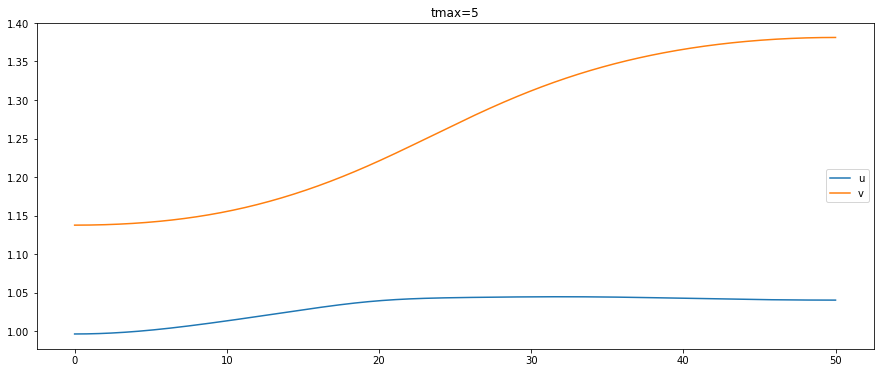

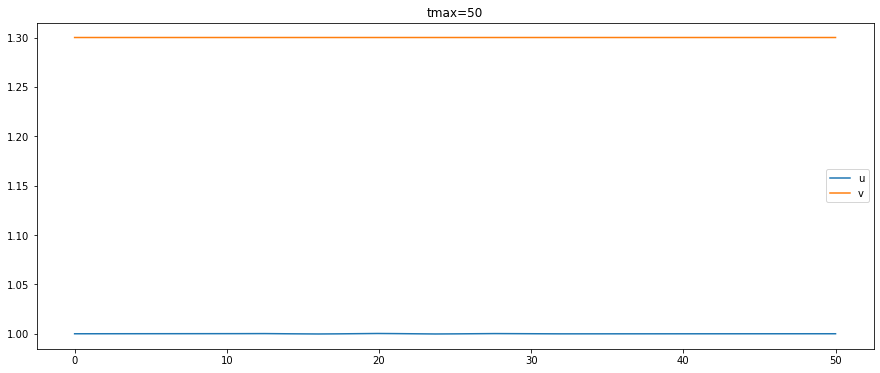

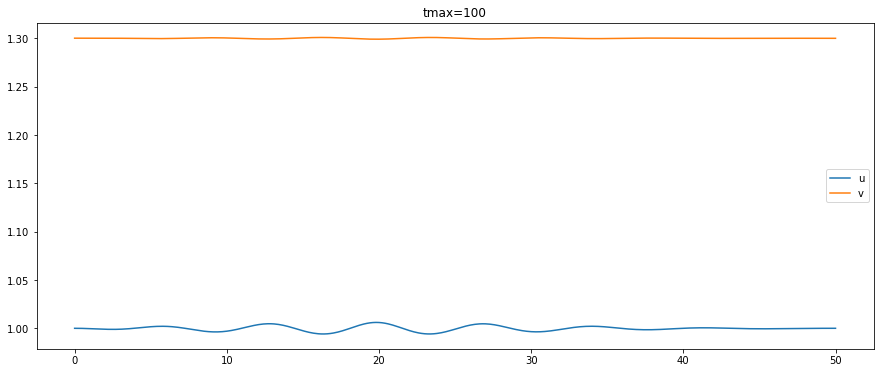

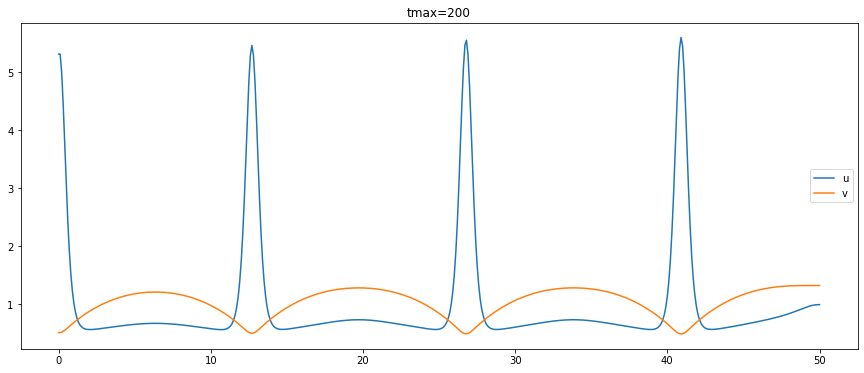

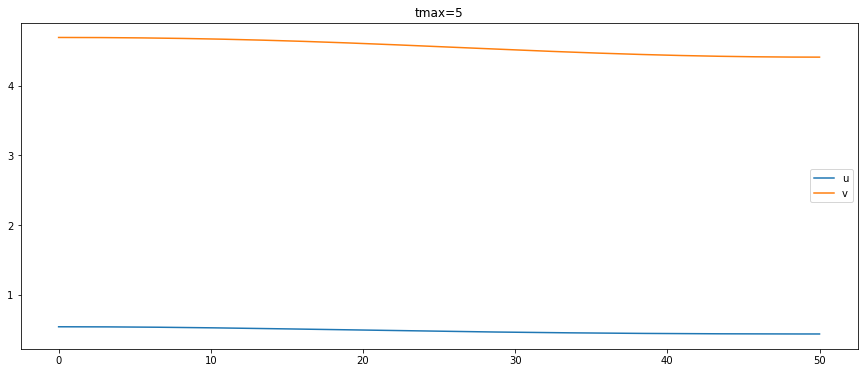

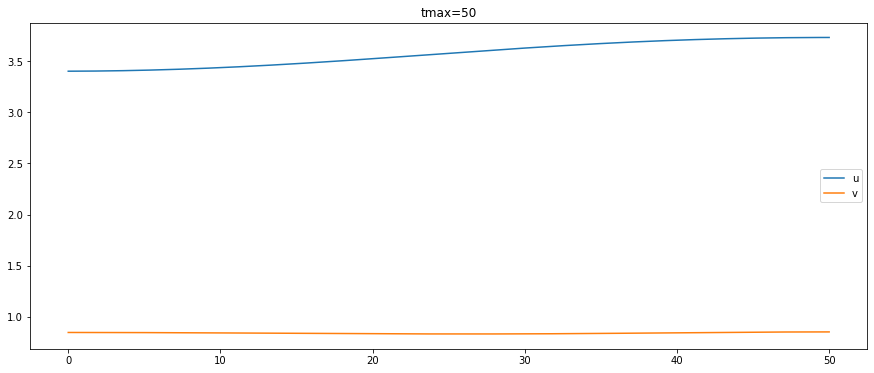

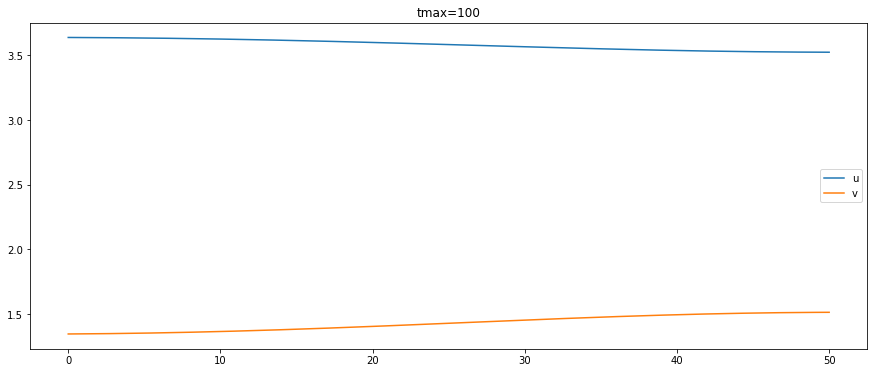

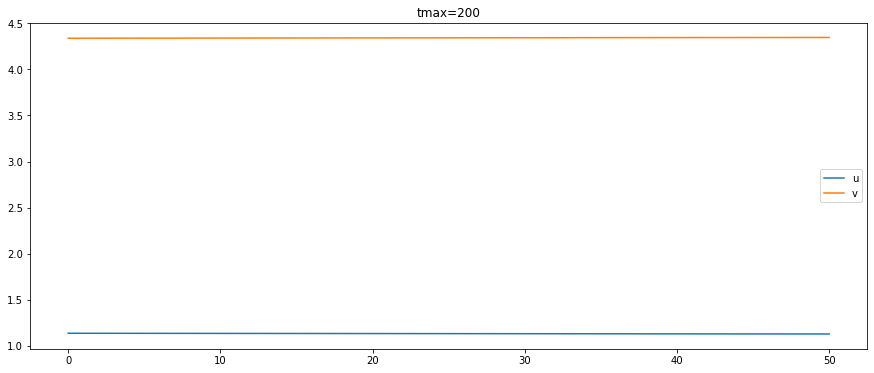

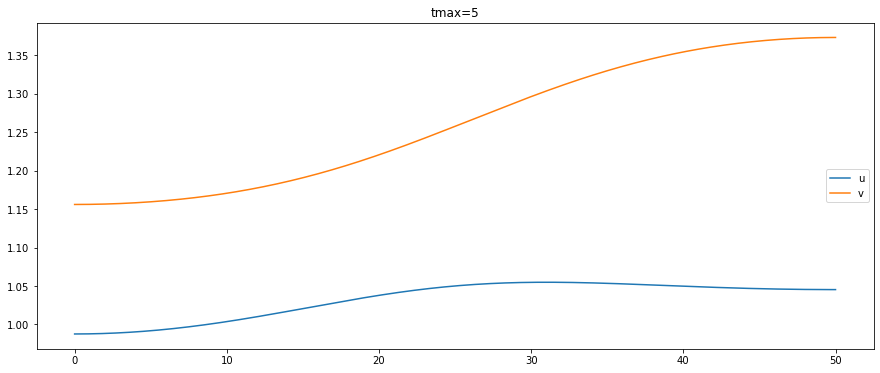

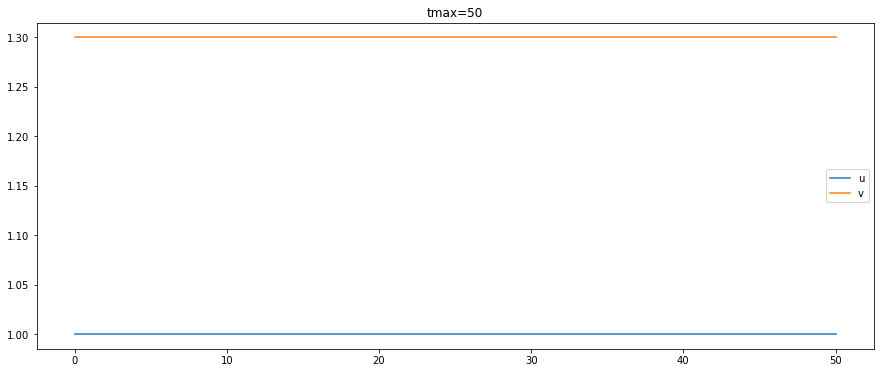

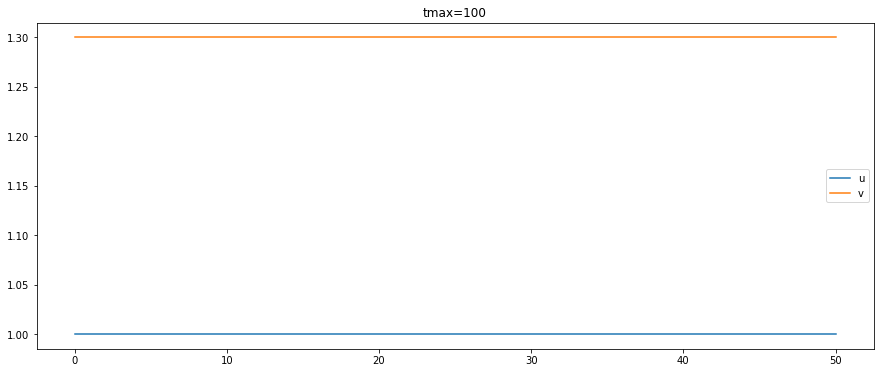

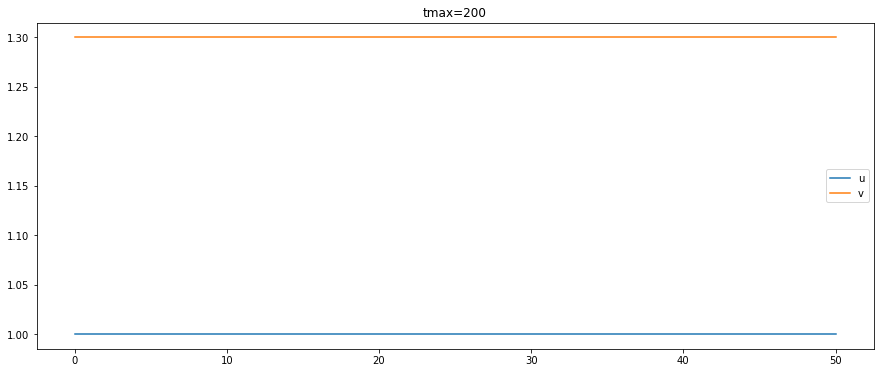

In [96]:
import numpy as np
import matplotlib.pyplot as plt

L=50
k=1/75
h = 1/10

N=int(np.floor(L/h))+1
x=np.linspace(0,L,N)


for i in range(3):

    A = 1*np.ones(N)
    B = np.array([1.3*np.ones(N), 3*np.ones(N), 1.3*np.ones(N)])
    Du = (0.1,10,10)
    Dv = 10

    a = (2*Du[i]*k/h**2)*np.ones(N)
    b = (-Du[i]*k/h**2)*np.ones(N)
    c = (-Du[i]*k/h**2)*np.ones(N)
    d = (2*Dv*k/h**2)*np.ones(N)
    e = (-Dv*k/h**2)*np.ones(N)
    f = (-Dv*k/h**2)*np.ones(N)


    #Matrice
    g = np.diagflat(b[1:],-1)+np.diagflat(c[:-1],1)+np.diagflat(1+a)
    z = np.diagflat(e[1:],-1)+np.diagflat(f[:-1],1)+np.diagflat(1+d)

    #Changement de la 1ère et dernière ligne
    g[0] = np.array([1+b[0], a[0], c[0]] + [0 for p in range(N-3)])
    g[-1] = np.array([0 for p in range(N-3)] + [b[0], a[0], 1+c[0]])

    z[0] = np.array([1+e[0], d[0], f[0]] + [0 for p in range(N-3)])
    z[-1] = np.array([0 for p in range(N-3)] + [e[0], d[0], 1+f[0]])

    #Inversion
    G = np.linalg.inv(g)
    Z = np.linalg.inv(z)
    
    for q in range(4):
        u=[]
        v=[]

        u.append(np.cos(x * np.pi / L + np.pi) + 1)
        v.append(np.cos(x * np.pi / L) + 1)
        
        tmax = (5,50,100,200)
        M=int(np.floor(tmax[q]/k))+1

    
        for j in range(M-1):

            u.append(G@(k*A + u[j]*(1+k*u[j]*v[j]-k*(B[i]+1))))
            v.append(Z@(k*B[i]*u[j]+v[j]*(1-k*u[j]*u[j])))   



        fig,ax=plt.subplots(figsize=(15,6))

        ax.plot(x,u[-1], label = "u")
        ax.plot(x,v[-1], label = "v") 
        ax.legend(loc="center right")
        ax.set_title('tmax=%i' %tmax[q])
        print("")
        plt.show()
